In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 500,500
import time
import sys
sys.path.append("/home/leejinwon/")
from acerxn import chem, process
import compute_chg_and_bo_gurobi
#import compute_chg_and_bo_gurobi2 as compute_chg_and_bo_gurobi
import numpy as np

In [2]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.includeRadicals = True
IPythonConsole.molSize = 500, 500

In [4]:
#smiles = "[H]c1c([H])c([H])c([N+](=O)[O-])c([O-])c1[H]"
#smiles = "[H]C(c1c([H])c([N+](=O)[O-])c([H])c([H])c1[O-])=c1sc2n(c1=O)C([H])(c1c([H])c(OC([H])([H])[H])c([H])c([H])c1OC([H])([H])[H])C1=C(N=2)c2c([H])c([H])c([H])c([H])c2C([H])([H])C1([H])[H]"
#smiles = "[H]OC([H])([H])c1c([H])c([H])c(C2([H])OC([H])(c3c([H])c([H])c([H])c(N([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])c3[H])OC([H])(C([H])([H])Sc3c([H])c([H])c([H])c([H])[n+]3[O-])C2([H])[H])c([H])c1[H]"
#smiles = "[H]c1sc(C([H])([H])c2nnn(C([H])(C(=O)OC([H])([H])[H])C([H])([H])C([H])([H])C([H])(N=[N+]=[N-])C(=O)OC([H])([H])[H])n2)c([H])c1[H]"
#smiles = "[H]c1c([H])c([H])n2c(=O)c3c([H])c(C(=O)N([H])C4([H])C([H])([H])C([H])([H])C([H])([H])C4([H])[H])c(N([H])[H])[n+](C([H])([H])C4([H])OC([H])([H])C([H])([H])C4([H])[H])c3nc2c1[H]"
#smiles = "[H]c1c([H])c([H])c(C([H])([H])N2c3c(c(C([H])([H])OC([H])([H])[H])c([H])c(C([H])([H])[H])[n+]3[H])C(=O)N3C(=O)c4c([H])c([H])c([H])c([H])c4C32[H])c([H])c1[H]"
#smiles = "[H]c1c([H])c(OC([H])([H])[H])c2c(c1OC([H])([H])[H])C1([H])C([H])([H])C2([H])C2([H])C1([H])C1(C([H])([H])[H])C3([H])C4([H])C([H])([H])C([H])(C5([H])c6c(c([H])c([H])[n+](C([H])([H])[H])c6[H])-c6c([H])c([H])[n+](C([H])([H])[H])c([H])c6C54[H])C3([H])C21C([H])([H])[H]"
#smiles = "[H]c1c(C([H])([H])[H])c([H])[c-]([H])c1[H]"
#smiles = "[H]C(=NN=c1sc2c([H])c(C([H])([H])[H])c([H])c([H])c2n1C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])c1c([H])c([N+](=O)[O-])c([O-])c([H])c1[O-]"
#smiles = "[H]c1c([H])c([H])c([N+](=O)[O-])c([O-])c1[H]"
#smiles = "[H]c1sc(S(=O)(=O)N([H])c2c([H])c([H])c([H])c([H])c2C([O-])=NC([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])c([H])c1[H]"
#smiles = "[H]C(=NN=c1sc2c([H])c(C([H])([H])[H])c([H])c([H])c2n1C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])c1c([H])c([N+](=O)[O-])c([O-])c([H])c1[O-]"
#smiles = "[H]C(c1c([H])c([N+](=O)[O-])c([H])c([H])c1[O-])=c1sc2n(c1=O)C([H])(c1c([H])c(OC([H])([H])[H])c([H])c([H])c1OC([H])([H])[H])C1=C(N=2)c2c([H])c([H])c([H])c([H])c2C([H])([H])C1([H])[H]"
#smiles = "[H]OC([H])([H])c1c([H])c([H])c(C2([H])OC([H])(c3c([H])c([H])c([H])c(N([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])c3[H])OC([H])(C([H])([H])Sc3c([H])c([H])c([H])c([H])[n+]3[O-])C2([H])[H])c([H])c1[H]"
#smiles = "[H]c1c([H])c([H])n2c(=O)c3c([H])c(C(=O)N([H])C4([H])C([H])([H])C([H])([H])C([H])([H])C4([H])[H])c(N([H])[H])[n+](C([H])([H])C4([H])OC([H])([H])C([H])([H])C4([H])[H])c3nc2c1[H]"
#smiles = "[H]C([H])([H])C([H])([H])C([H])([H])C([H])([H])SB(C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H]"
#smiles = "[H]c1c(C([H])([H])[H])c([H])[c-]([H])c1[H]"
#smiles = "[H]C(=NN=c1sc2c([H])c(C([H])([H])[H])c([H])c([H])c2n1C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])c1c([H])c([N+](=O)[O-])c([O-])c([H])c1[O-]"
#smiles = "[H]c1c([H])c([H])c([N+](=O)[O-])c([O-])c1[H]"
#smiles = "[H]c1c([H])c(N([H])N=C(Sc2nnnn2-c2c([H])c([H])c(C([H])([H])[H])c([H])c2[H])C(=O)[C+]([H])[H])c([H])c([H])c1Cl"
#smiles = "[H]C(=NN=c1sc2c([H])c(C([H])([H])[H])c([H])c([H])c2n1C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])c1c([H])c([N+](=O)[O-])c([O-])c([H])c1[O-]"
resolve = 1

In [26]:
from rdkit.Chem import AllChem
from openbabel import pybel
#molmol = Chem.MolFromSmiles(smiles)
#molmol = Chem.AddHs(molmol)
#molmol

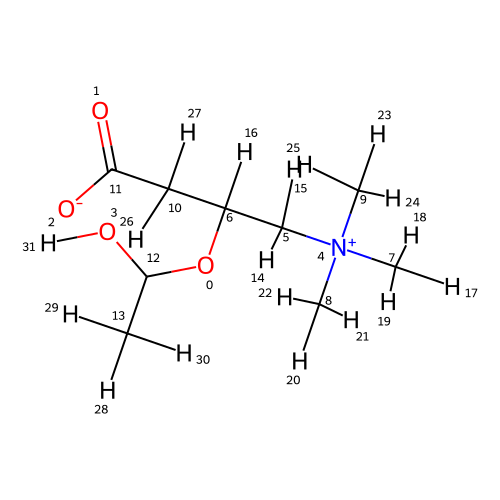

In [19]:
import pickle
with open('000001.xyz.pkl', 'rb') as f:
    acemol = pickle.load(f)
m = acemol.get_rd_mol()
m

In [20]:
resolve = bool(resolve)
#molecule = chem.Molecule(smiles)
molecule = chem.Molecule("000001.xyz")
(
    period_list,
    group_list,
    z_list,
    ve_list,
    adj_list,
    bond_list,
    bond_mapping,
    neighbor_list,
    ring_list,
    ring_bond_list
) = compute_chg_and_bo_gurobi.get_lists(molecule)

print(ring_list)

chg_mol = molecule.get_chg()
#chg_mol = 1
if chg_mol is None:
    chg_mol = 0
print("mol chg", chg_mol)
molecule.adj_matrix = molecule.get_adj_matrix()
molecule.atom_feature["chg"] = None
molecule.bo_matrix = None
t = time.time()
(
    chg_list,
    bo_matrix,
    chg_list2,
    bo_matrix2,
) = compute_chg_and_bo_gurobi.compute_chg_and_bo_debug(molecule, chg_mol, resolve=resolve, cleanUp=True, mode="")
actobo_time = time.time() - t

#print("hihi", molecule.get_element_list())
#print("hihi", chg_list, len(chg_list))
#print("hihi2", chg_list2, len(chg_list2))
molecule.atom_feature["chg"] = chg_list
molecule.bo_matrix = bo_matrix
rd_actobo1 = molecule.get_rd_mol()
Chem.SanitizeMol

#try:
#    Chem.SanitizeMol(rd_actobo1)
#    smi_actobo = Chem.MolToSmiles(rd_actobo1)
#    print(smi_actobo)
#    print(smiles == smi_actobo)
#    print(actobo_time)
#    print()
#except Exception as e:
#    print("Sanitization Failed")
#    print()
#    raise e
print(chg_list)
print(chg_list2)
molecule.atom_feature["chg"] = chg_list2
molecule.bo_matrix = bo_matrix2
rd_actobo2 = molecule.get_rd_mol()
#try:
#    Chem.SanitizeMol(rd_actobo2)
#    smi_actobo = Chem.MolToSmiles(rd_actobo2)
#    print(smi_actobo)
#    print(smiles == smi_actobo)
#    print(actobo_time)
#except:
#    print("Sanitization Failed")

[]
mol chg 0
alreadyOctet (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13]),)
alreadyOctet (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13]),)
[ 0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
[ 0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]


In [17]:
new_z = list(np.where(z_list > 1, 6, 1))
new_adj = molecule.get_adj_matrix()
#print(new_adj)
chg_list = np.zeros(len(new_z))
new = chem.Molecule([new_z, new_adj, None, chg_list])

#print(new.adj_matrix)

new_rd = new.get_rd_mol()
for i, bond in enumerate(new_rd.GetBonds()):
    #print(i, bond)
    pass
Chem.SanitizeMol(new_rd)
sssrs = Chem.GetSymmSSSR(new_rd)
for i in range(len(sssrs)):
    #print(list(sssrs[i]))
    pass
print()
#new_rd
print(molecule.get_chg_list()[12])


-1


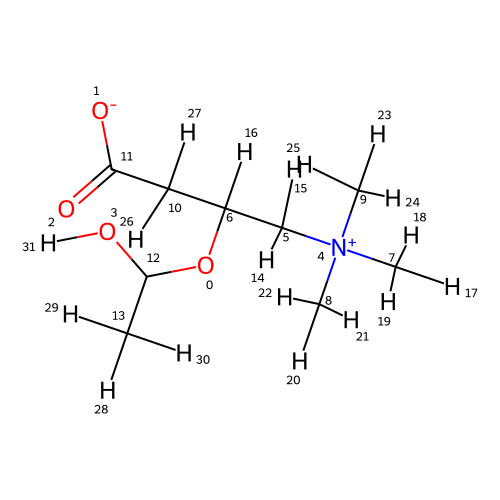

In [21]:
#for i, atom in enumerate(rd_actobo1.GetAtoms()):
#    atom.SetProp("atomLabel", atom.GetSymbol())
rd_actobo1_rH = Chem.RemoveHs(rd_actobo1)
#print(Chem.MolToSmiles(rd_actobo1_rH))
rd_actobo1

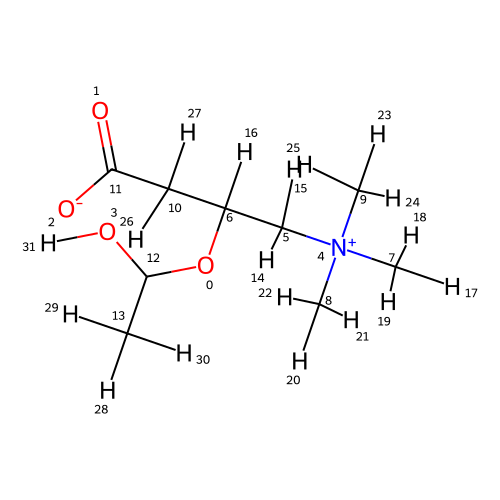

In [22]:
#for i, atom in enumerate(rd_actobo2.GetAtoms()):
#    atom.SetProp("atomLabel", atom.GetSymbol())
#    atom.SetFormalCharge(int(chg_list2[i]))
#rd_actobo2_rH = Chem.RemoveHs(rd_actobo2)
rd_actobo2

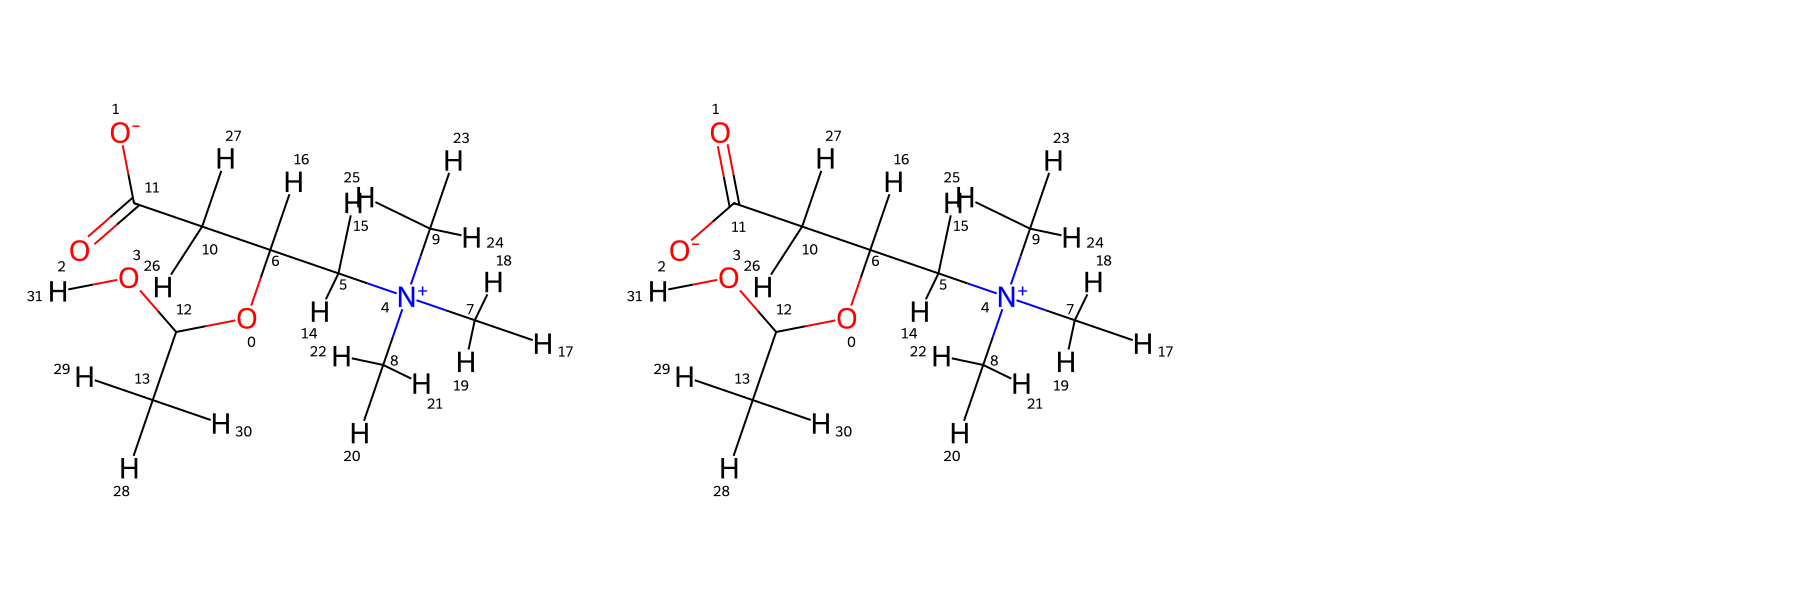

In [23]:
Draw.MolsToGridImage([rd_actobo1, rd_actobo2], subImgSize=(600,600))

In [17]:
Draw.MolsToGridImage([rd_actobo1, rd_actobo2, Chem.MolFromSmiles(smiles)], subImgSize=(450,450))

NameError: name 'smiles' is not defined

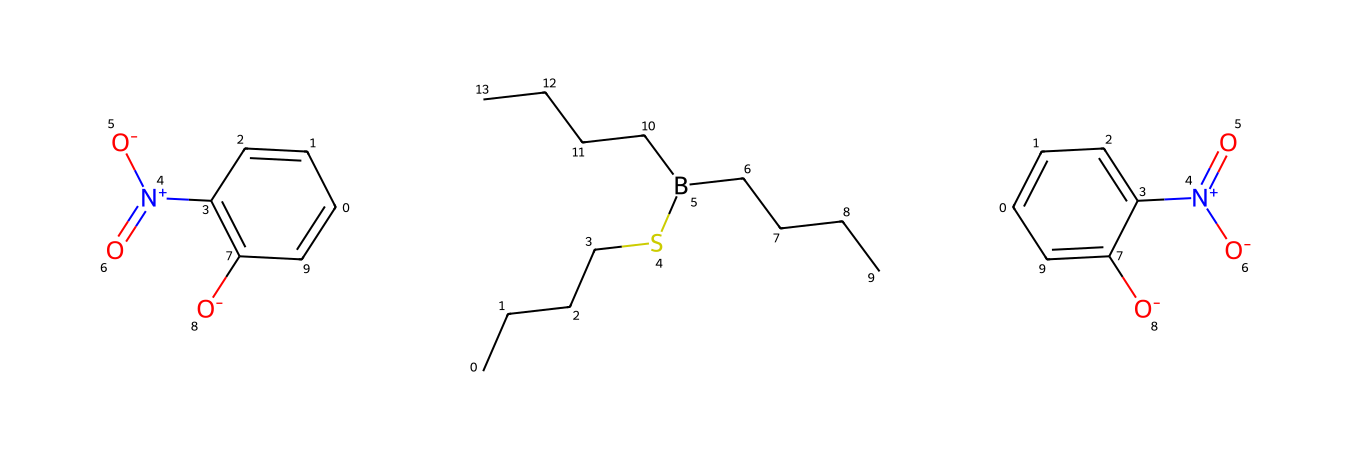

In [111]:
Draw.MolsToGridImage([rd_actobo1_rH, rd_actobo2_rH, Chem.MolFromSmiles(smiles)], subImgSize=(450,450))